# Глава 8 (Иванов Илья, группа 3530901/70203)

## Теория
В этой главе будет рассмотрена одна из важных и полезных идей в обработке сигналов: теорема о свёртке. Сначала рассмотрим саму свёртку, а потом перейдём к теореме. Начнём с простейшего случая - со сглаживания.

### Сглаживание
Сглаживание - это операция, удаляющая быстрые изменения сигнала для выявления общих особенностей.

Обычный алгоритм сглаживания называют скользящим средним - оно даёт среднее из предыдущих $n$ значений для некоторого $n$.

Сглаживание удалялет самые резкие изменения и упрощает оценку долгосрочных тенденций.

Сглаживание применяется и к звуковым сигналам.

Для расчёта взвешенной суммы выборок из сигнала, например скользящего среднего, можно использовать окна.

### Свёртка
Применение оконной функции к перекрывающимся сегментам сигнала - и есть свёртка.

Определение свёртки:!!!

Символ !!! обозначает свёртку. $m$ отрицательное, и суммирование выполняется в порядке, обратном элементам $g$.

Почему свёртка определена так, что окно накладывается с конца? Тому есть две причины:

1. данное определение естественно во многих областях, особенно в анализе систем обработки сигналов;

2. данное определение также является и основой теоремы о свёртке.

### Теорема о свёртке
Математически говоря, !!!

где $f$ - массив сигнала, а $g$ - окно. Теорема о свёртке гласит, что ДПФ от свёртки $f$ и $g$ даёт тот же результат, что и поэлементное перемножение ДПФ $f$ и ДПФ $g$.

Применение операции типа свёртки к сигналу подразумевает работу во временной области, ибо сигнал - функция времени. Применение операции типа умножения к ДПФ подразумевает работу в частотной области, ибо ДПФ - функция частоты.

Сформулируем теорему о свёртке лаконичнее:

Свёртка во временной области соответствует умножению в частотной области.

ДПФ окна называется фильтром. Для любого свёрточного окна во временной области существует соответствующий фильтр в частотной области. И для любого фильтра, выражаемого через поэлементное умножение в частотной области, есть соответствующее окно.

### Гауссов фильтр
Окно скользящего среднего, рассмотренное ранее, есть фильтр НЧ, но он не очень хорош. ДПФ сначала резко падает, а потом заметно колеблется. Эти колебания называют боковыми лепестками, а появляются они оттого, что окно скользящего среднего похоже на прямоугольный сигнал и высокочастотные гармоники в его спектре спадают пропорционально $1/f$, то есть медленно.

Лучше показывает себя гауссово окно. Его форма - дискретное приближение гауссова "колокола".

Гауссово сглаживание как фильтр НЧ лучше скользящего среднего. После спада соотношение остаётся малым, почти без боковых лепестков, свойственных прямоугольному окну. Так что оно лучше подавляет высокие частоты.

Оно работает так хорошо потому, что ДПФ гауссовой кривой - также гауссова кривая. И соотношение спадает пропорционально !!!, а это намного быстрее, чем $1/f$.

### Эффективная свёртка
Одна из причин важности алгоритма БПФ в том, что в сочетании с теоремой о свёртке он даёт эффективный способ вычисления свёртки, кросс-корреляции и автокорреляции.
Теорема о свёртке гласит: !!!

Поэтому один из способов вычисления свёртки: !!!

где $IDTF$ - обратное ДПФ. Простая реализация свёртки требует времени пропорционально $N^2$; алгоритм с БПФ требует времени пропорционально $N\log N$.

## Упражнения

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import scipy.signal

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

### Упражнение 8.1.
The notebook for this chapter is `chap08.ipynb`. Read through it and run the code.

It contains an interactive widget that lets you experiment with the parameters of the Gaussian window to see what effect they have on the cutoff frequency.

What goes wrong when you increase the width of the Gaussian, `std`, without increasing the number of elements in the window, `M`?

` chap08.ipynb` был просмотрен и разобран.

Если при увеличении ширины гауссова окна `std` не увеличивать число элементов в окне "M", то окно становится ближе к прямоугольному, хуже подавляются высокие частоты, появляются боковые лепестки.

### Упражнение 8.2.
In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For discrete Fourier transforms, this relationship is approximately true.

Try it out for a few examples. What happens to the Fourier transform as you vary `std`?

Начнём с гауссиана, подобного примеру в книге

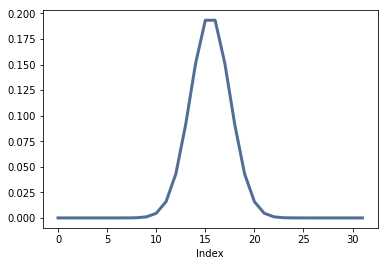

In [2]:
gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
thinkplot.plot(gaussian)
thinkplot.config(xlabel='Index')

БПФ:

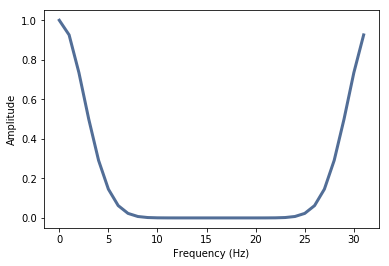

In [3]:
fft_gaussian = np.fft.fft(gaussian)
thinkplot.plot(abs(fft_gaussian))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Если "прокрутить" отрицательные частоты влево, можно увидеть более чётко, что это гауссиан, по крайней мере, приблизительно.

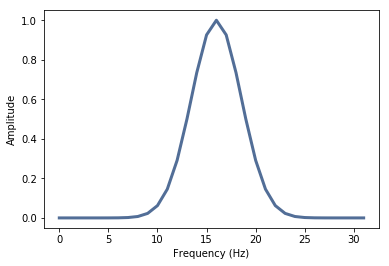

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
thinkplot.plot(abs(fft_rolled))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Следующая функция отображает окно Гаусса и его БПФ:

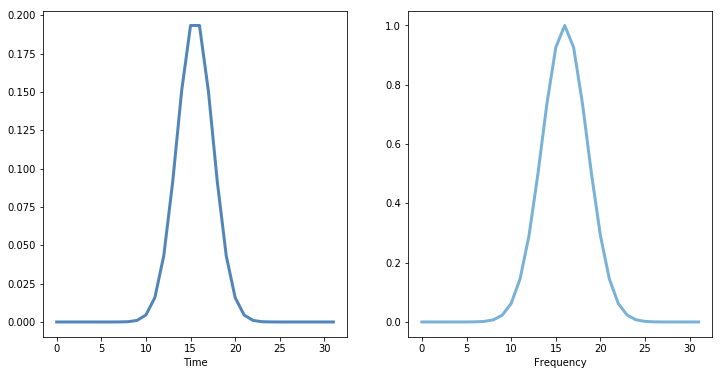

In [5]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

    
plot_gaussian(2)

Теперь мы можем пронаблюдать, что происходит при изменении `std`.

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

При увеличении `std` Гауссиан становится шире, а его БПФ - уже.

С точки зрения математики, если

$f(x) = e^{-a x^2}$ - гауссиан со средним 0 и стандартным отклонением $1/a$, то его преобразование Фурье:

$F(k) = \sqrt{\frac{\pi}{a}} e^{-\pi^2 k^2/a}$ -также гауссиан со стандартным отклонением $a/\pi^2$. 

Таким образом, между стандартными отклонениями $f$ и $F$ существует обратная зависимость.

### Упражнение 8.3.
If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.

In addition to the Gaussian window we used in this chapter, create a Hamming window with the same size. Zero pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log-y scale.

Experiment with a few different windows and a few different sizes.

Создадим 1-секундную волну с частотой дискретизации 44,1 кГц:

In [7]:
signal = thinkdsp.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Создадим различные окна:

In [8]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [gaussian, blackman, hamming, hanning]
names = ['gaussian', 'blackman', 'hamming', 'hanning']

for window in windows:
    window /= sum(window)

Посмотрим, как они выглядят:

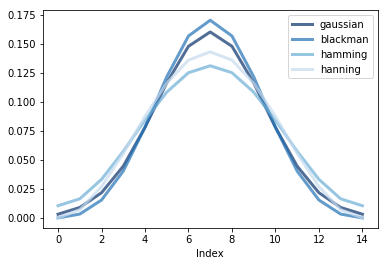

In [9]:
thinkplot.preplot(4)
for window, name in zip(windows, names):
    thinkplot.plot(window, label=name)

thinkplot.config(xlabel='Index', legend=True, loc='center bottom')

Они очень похожи. Посмотрим, как выглядят их ДПФ:

In [10]:
def plot_window_dfts(windows, names):
    thinkplot.preplot(5)

    for window, name in zip(windows, names):
        padded = thinkdsp.zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        thinkplot.plot(abs(dft_window), label=name)

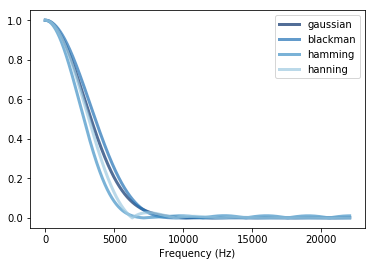

In [11]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', loc='upper right')

Также довольно похоже, но Хэмминг падает быстрее всех, Блэкман - медленнее, а у Хеннинга - самые видимые боковые лепестки.

В логарифмическом масштабе мы видим, что поначалу Хэмминг и Хеннинг спадают быстрее, чем другие, у окон Хэмминга и Гаусса, похоже, самые устойчивые боковые лепестки, а окно Хеннинга, кажется, имеет лучшую комбинацию быстрого спада и минимальных боковых лепестков.

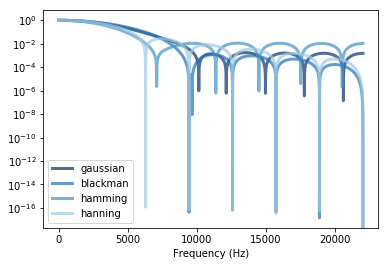

In [12]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', yscale='log', loc='lower left')